In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime

In [2]:
homeprice=pd.read_csv('../Inputs/GDPInputs/Sale_Prices_Zip.csv')
business=pd.read_csv('../Inputs/GDPInputs/Licensed_Businesses_WA.csv')
pot_sales=pd.read_csv('../Inputs/GDPInputs/Sales_and_Tax_Report_WA.csv')

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
wa_all_hp=homeprice.loc[homeprice['StateName']=='Washington',['RegionName','2008-03','2008-04','2008-05','2008-06','2008-07',
 '2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08',
 '2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09',
 '2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10',
 '2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11',
 '2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
 '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01',
 '2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02',
 '2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03',
 '2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04',
 '2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11']]
wa_all_hp.rename(columns={'RegionName':'Zip_AverageHomeSale'},inplace=True)
wa_all_hp.set_index('Zip_AverageHomeSale',inplace=True)
wa_all_hp=wa_all_hp.transpose()
wa_all_hp.head()

Zip_AverageHomeSale,98052,98012,98103,98682,98133,99208,98122,98208,98034,98109,...,98446,98252,98328,98327,98418,99026,98580,98606,98329,98629
2008-03,431100.0,384900.0,NaN,225100.0,318100.0,208400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04,429300.0,375100.0,NaN,221700.0,338700.0,213800.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05,419000.0,364300.0,NaN,218100.0,322100.0,207400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06,412800.0,374900.0,NaN,213700.0,336900.0,202900.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07,413100.0,368100.0,NaN,216400.0,332500.0,199500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
business.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,Zip,CreateDate,DayPhone
0,BEAUSOLEIL,ACTIVE (ISSUED),416694,6033541680010000,MARIJUANA PRODUCER TIER 3/MARIJUANA PROCESSOR,7903 BEAVER VALLEY RD STE A,NaN,CHIMACUM,WA,JEFFERSON,983250000,20171229,2.253299e+09
1,'OH' MCDONALD FARMS,ACTIVE (ISSUED),413650,6034429790010000,MARIJUANA PRODUCER TIER 2/MARIJUANA PROCESSOR,250 W AXTON RD,NaN,BELLINGHAM,WA,WHATCOM,982267315,20171104,3.609667e+09
2,POT ZONE,ACTIVE (ISSUED),415229,6033538680010000,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,983669599,20171114,2.533127e+09
3,BEST BUDS MARKETING AND DISTRIBUTION,ACTIVE (ISSUED),425431,6041333310010000,MARIJUANA TRANSPORTATION,1206 N DOLARWAY RD STE 116,NaN,ELLENSBURG,WA,KITTITAS,989268392,20171115,2.064095e+09
4,RED FROG,ACTIVE (ISSUED),412437,6033472750010000,MARIJUANA PRODUCER TIER 3/MARIJUANA PROCESSOR,12815 227TH AVE SE STE A,STE A,MONROE,WA,SNOHOMISH,982728720,20171130,3.608059e+09


In [5]:
retailers=business.loc[(business['Type']=='MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT') | (business['Type']=='MARIJUANA RETAILER'),: ]

In [6]:
retailers.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,Zip,CreateDate,DayPhone
2,POT ZONE,ACTIVE (ISSUED),415229,6033538680010000,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,983669599,20171114,2.533127e+09
6,ALTITUDE,ACTIVE (ISSUED),414225,6033570900010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,260 MERLOT DR,NaN,PROSSER,WA,BENTON,993500000,20171114,5.097864e+09
18,DOCKSIDE CANNABIS,ACTIVE (ISSUED),414174,6033563140010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,1728 4TH AVE S,NaN,SEATTLE,WA,KING,981340000,20171214,2.062236e+09
21,FILLABONG,ACTIVE (ISSUED),415211,6035601210010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,2839 NW KITSAP PL STE A,NaN,SILVERDALE,WA,KITSAP,983839447,20171023,3.606980e+09
25,HERBAL NATION,ACTIVE (ISSUED),413683,6034896600010000,MARIJUANA RETAILER/MEDICAL MARIJUANA ENDORSEMENT,19302 BOTHELL EVERETT HWY,NaN,BOTHELL,WA,SNOHOMISH,980127113,20180306,4.254861e+09


In [7]:
retailers['UBI']=retailers.UBI.astype(str).apply(lambda x: x[:9])

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
retailers.dropna(subset=['UBI'],inplace=True)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
retailers['UBI']=retailers['UBI'].astype(int)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
pot_sales=pot_sales.loc[pot_sales['Total Sales'] != 0,:]
pot_sales.dropna(subset=['UBI'],inplace=True)
pot_sales.head()

,Trade Name,License Number,UBI,Privilege Code,Period Start,Period End,Total Sales,Excise Tax,Total Due,Status,Submit Date,Fiscal Year
2,HONU ENTERPRISES,412097,603341347,393,9/1/2016,9/30/2016,318638.59,0.00,0.00,Confirmed,10/18/2016,2017
3,MILLER'S MARIJUANA,415001,603358103,0394 0395,9/1/2015,9/30/2015,91718.76,33935.94,33935.94,Confirmed,10/19/2015,2016
5,HERBSCAPES,412670,601264180,391,12/1/2014,12/31/2014,4956.00,1239.00,1239.00,Confirmed,1/15/2015,2015
6,AISLING ENTERPRISES,413288,602990684,391,5/1/2016,5/31/2016,1407.00,0.00,0.00,Confirmed,6/20/2016,2016
8,THE SUNSHINE TIKI HUT,417198,602883407,393,10/1/2016,10/31/2016,23714.25,0.00,0.00,Unconfirmed,NaN,2017


In [11]:
ret_sales=retailers.merge(pot_sales,on='UBI')

In [12]:
ret_sales.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,...,License Number,Privilege Code,Period Start,Period End,Total Sales,Excise Tax,Total Due,Status,Submit Date,Fiscal Year
0,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,12/1/2014,12/31/2014,168401.31,42100.33,42100.33,Confirmed,1/2/2015,2015
1,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,7/1/2016,7/31/2016,402176.18,148805.19,148805.19,Confirmed,8/11/2016,2017
2,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,8/1/2014,8/31/2014,35100.00,8775.00,8775.00,Confirmed,9/8/2014,2015
3,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,4/1/2016,4/30/2016,325055.49,120270.53,120270.53,Confirmed,5/12/2016,2016
4,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,415229,394,9/1/2016,9/30/2016,403418.30,149264.77,149264.77,Confirmed,10/12/2016,2017


In [13]:
# ret_sales[['Sales Month','Date','Sales Year']] = ret_sales['Period End'].str.split('/',expand=True)
# ret_sales.drop(columns={'Date'},inplace=True)

In [14]:
dates=pd.to_datetime(ret_sales['Period Start'],format='%m/%d/%Y')
ret_sales['Sales Month']=dates.apply(lambda x: x.strftime('%Y-%m'))

In [15]:
ret_sales['Zip']=ret_sales['Zip'].astype(str).apply(lambda x: x[:5]).astype(int)


In [16]:
ret_sales.head()

,Organization,Active,License,UBI,Type,Address,Address Line 2,City,State,County,...,Privilege Code,Period Start,Period End,Total Sales,Excise Tax,Total Due,Status,Submit Date,Fiscal Year,Sales Month
0,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,12/1/2014,12/31/2014,168401.31,42100.33,42100.33,Confirmed,1/2/2015,2015,2014-12
1,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,7/1/2016,7/31/2016,402176.18,148805.19,148805.19,Confirmed,8/11/2016,2017,2016-07
2,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,8/1/2014,8/31/2014,35100.00,8775.00,8775.00,Confirmed,9/8/2014,2015,2014-08
3,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,4/1/2016,4/30/2016,325055.49,120270.53,120270.53,Confirmed,5/12/2016,2016,2016-04
4,POT ZONE,ACTIVE (ISSUED),415229,603353868,MARIJUANA RETAILER,1703 SE SEDGWICK RD,STE 113,PORT ORCHARD,WA,KITSAP,...,394,9/1/2016,9/30/2016,403418.30,149264.77,149264.77,Confirmed,10/12/2016,2017,2016-09


In [17]:
mj_sales_zip=pd.crosstab(ret_sales['Zip'],ret_sales['Sales Month'],values=ret_sales['Total Sales'],aggfunc=np.sum).transpose()
mj_sales_zip.head()

Zip,94140,98002,98003,98004,98005,98006,98007,98012,98020,98021,...,99223,99224,99336,99337,99344,99350,99352,99354,99362,99403
Sales Month,,,,,,,,,,,,,,,,,,,,,
2014-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,129982.22,NaN,NaN,NaN,NaN
2014-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,220661.44,NaN,NaN,NaN,NaN
2014-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,186974.66,NaN,NaN,NaN,NaN
2014-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,186469.59,NaN,NaN,NaN,NaN
2014-11,NaN,15761.4,NaN,NaN,106287.31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,208680.10,NaN,NaN,NaN,NaN


In [18]:
all_data=mj_sales_zip.join(wa_all_hp,how='inner',lsuffix='_mjsales',rsuffix='_homeprice')
all_data

,94140,98002_mjsales,98003_mjsales,98004_mjsales,98005,98006_mjsales,98007,98012_mjsales,98020_mjsales,98021_mjsales,...,98446,98252_homeprice,98328,98327,98418,99026_homeprice,98580,98606,98329_homeprice,98629
2014-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,272200.0,NaN,NaN,NaN,NaN,211400.0,NaN
2014-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,267000.0,NaN,NaN,NaN,NaN,199800.0,NaN
2014-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,266500.0,NaN,NaN,NaN,NaN,221900.0,NaN
2014-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,217800.0,NaN,266800.0,NaN,NaN,NaN,NaN,211200.0,NaN
2014-11,NaN,15761.40,NaN,NaN,106287.31,NaN,NaN,NaN,NaN,NaN,...,NaN,214300.0,NaN,268200.0,NaN,NaN,NaN,NaN,222700.0,NaN
2014-12,NaN,59842.53,NaN,NaN,204653.61,NaN,NaN,NaN,NaN,NaN,...,NaN,218500.0,NaN,269900.0,NaN,NaN,NaN,NaN,213400.0,NaN
2015-01,NaN,101088.68,NaN,NaN,303957.17,NaN,NaN,NaN,NaN,NaN,...,NaN,225300.0,NaN,263800.0,NaN,NaN,NaN,NaN,197200.0,NaN
2015-02,NaN,135106.09,NaN,22985.70,325705.58,NaN,NaN,NaN,NaN,NaN,...,NaN,231500.0,NaN,259600.0,NaN,NaN,NaN,NaN,199400.0,NaN
2015-03,NaN,191242.75,NaN,63083.46,391733.58,NaN,NaN,NaN,NaN,NaN,...,NaN,227800.0,NaN,256300.0,NaN,NaN,277200.0,NaN,201900.0,NaN
2015-04,NaN,248284.60,NaN,120910.98,380528.50,NaN,NaN,77796.91,NaN,NaN,...,236200.0,225600.0,NaN,276700.0,NaN,226300.0,264000.0,NaN,212600.0,NaN


In [19]:
df=all_data.filter(like='_',axis=1)
df

,98002_mjsales,98003_mjsales,98004_mjsales,98006_mjsales,98012_mjsales,98020_mjsales,98021_mjsales,98026_mjsales,98027_mjsales,98028_mjsales,...,98408_homeprice,98057_homeprice,98663_homeprice,98660_homeprice,98321_homeprice,99218_homeprice,98424_homeprice,98252_homeprice,99026_homeprice,98329_homeprice
2014-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,142300.0,NaN,NaN,218200.0,264200.0,194600.0,NaN,NaN,NaN,211400.0
2014-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,144900.0,NaN,NaN,212700.0,264900.0,199900.0,NaN,NaN,NaN,199800.0
2014-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152500.0,NaN,NaN,215200.0,245800.0,204000.0,NaN,NaN,NaN,221900.0
2014-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146700.0,NaN,NaN,224300.0,232000.0,199600.0,NaN,217800.0,NaN,211200.0
2014-11,15761.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146700.0,NaN,NaN,227800.0,232800.0,196100.0,NaN,214300.0,NaN,222700.0
2014-12,59842.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,143100.0,NaN,209100.0,237100.0,239900.0,207200.0,NaN,218500.0,NaN,213400.0
2015-01,101088.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5916.24,NaN,...,145700.0,NaN,211200.0,221600.0,251500.0,200800.0,NaN,225300.0,NaN,197200.0
2015-02,135106.09,NaN,22985.70,NaN,NaN,NaN,NaN,NaN,119391.52,NaN,...,148600.0,NaN,221100.0,222900.0,293400.0,196900.0,NaN,231500.0,NaN,199400.0
2015-03,191242.75,NaN,63083.46,NaN,NaN,NaN,NaN,NaN,222210.09,NaN,...,156000.0,NaN,245400.0,215000.0,302200.0,198200.0,NaN,227800.0,NaN,201900.0
2015-04,248284.60,NaN,120910.98,NaN,77796.91,NaN,NaN,NaN,297409.05,NaN,...,156500.0,NaN,229500.0,218600.0,298700.0,205500.0,NaN,225600.0,226300.0,212600.0


In [20]:
x=pd.DataFrame(list(df))
x[0]=x[0].str.split('_',expand=True)
y=x[0].unique()
y

array(['98002', '98003', '98004', '98006', '98012', '98020', '98021',
       '98026', '98027', '98028', '98033', '98034', '98036', '98037',
       '98038', '98042', '98043', '98052', '98055', '98056', '98057',
       '98072', '98087', '98103', '98105', '98106', '98107', '98109',
       '98112', '98116', '98117', '98118', '98121', '98122', '98125',
       '98133', '98136', '98144', '98155', '98168', '98178', '98198',
       '98201', '98203', '98204', '98208', '98223', '98252', '98258',
       '98275', '98290', '98296', '98321', '98329', '98373', '98387',
       '98404', '98405', '98406', '98408', '98409', '98424', '98444',
       '98445', '98499', '98604', '98660', '98661', '98663', '98664',
       '98665', '98682', '98683', '98684', '99026', '99202', '99205',
       '99206', '99208', '99216', '99217', '99218', '99223', '99224'],
      dtype=object)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


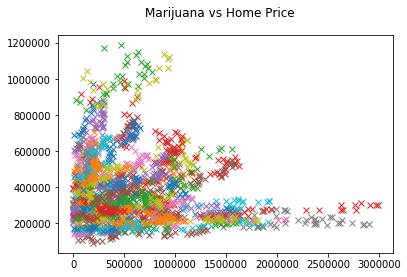

In [34]:
fig,ax=plt.subplots()
fig.suptitle("Marijuana vs Home Price")


for i in y:
    df1=df[['{0}_mjsales'.format(i),'{0}_homeprice'.format(i)]]
    df1.dropna(inplace=True)
    ax.plot(df1["{0}_mjsales".format(i)],df1["{0}_homeprice".format(i)],marker='x',linewidth=0)


plt.show()

In [22]:
df1=df[['98004_mjsales','98004_homeprice']]


In [23]:
df1.dropna(inplace=True)


C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


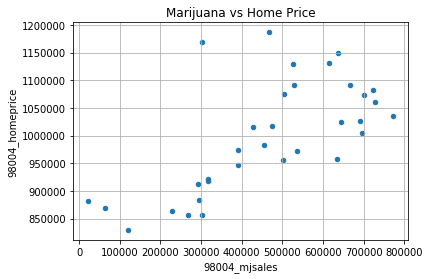

In [24]:
df1.plot(kind="scatter", x="98004_mjsales", y="98004_homeprice", grid=True,
              title="Marijuana vs Home Price")
plt.show()

In [25]:
df2=df[['98012_mjsales','98012_homeprice']]
df2.dropna(inplace=True)

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


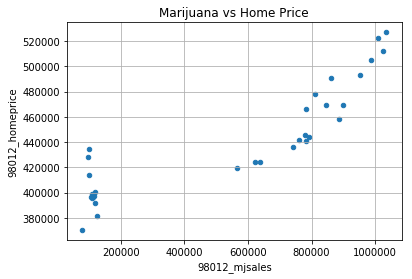

In [26]:
df2.plot(kind="scatter", x="98012_mjsales", y="98012_homeprice", grid=True,
              title="Marijuana vs Home Price")

plt.show()

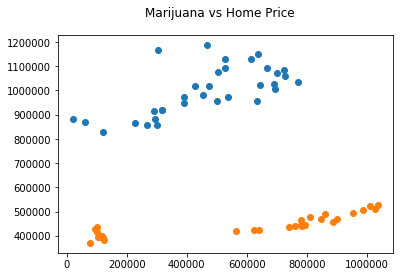

In [27]:
fig,ax=plt.subplots()
fig.suptitle("Marijuana vs Home Price")
ax.plot(df1["98004_mjsales"],df1["98004_homeprice"],marker='o',linewidth=0)
ax.plot(df2["98012_mjsales"],df2["98012_homeprice"],marker='o',linewidth=0)
plt.show()

C:\Users\mstos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


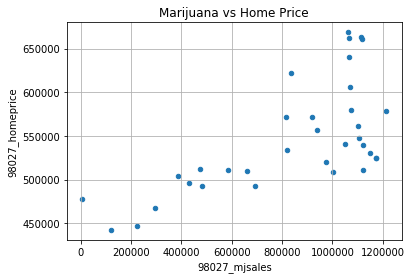

In [28]:
df3=df[['98027_mjsales','98027_homeprice']]
df3.dropna(inplace=True)
df3.plot(kind="scatter", x="98027_mjsales", y="98027_homeprice", grid=True,
              title="Marijuana vs Home Price")
plt.show()